 # 📂 Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from IPython.core.display import HTML

In [1]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

# 📟 Data Explore 

In [3]:
df_nonfilt = pd.read_csv('./data_final.csv', header=0, error_bad_lines=False)
df_nonfilt.head()

b'Skipping line 87244: expected 20 fields, saw 21\nSkipping line 87245: expected 20 fields, saw 21\nSkipping line 87246: expected 20 fields, saw 21\n'
b'Skipping line 254459: expected 20 fields, saw 21\nSkipping line 254460: expected 20 fields, saw 21\nSkipping line 254461: expected 20 fields, saw 21\n'


,age,previous_job_title_id,job_position_id,skill_id,skill_name,job_position,job_function,industry_name,company_name,satisfaction_level,stress_level,university_name,experience_id,english_level,gender,salary,bracket,yearly_bonus,created_at,previous_position
0,25.0,22232.0,21462,402.0,3ds Max,Facility Coordinator,Administrative,Mass Transportation,Berkeley International School,7.0,8.0,NaN,1,NaN,Male,400000,0-3,NaN,2018-05-10 18:44:40,NaN
1,25.0,22232.0,21462,79.0,3D Rendering,Facility Coordinator,Administrative,Mass Transportation,Berkeley International School,7.0,8.0,NaN,1,NaN,Male,400000,0-3,NaN,2018-05-10 18:44:40,NaN
2,25.0,22232.0,21462,351.0,Ability to travel abroad,Facility Coordinator,Administrative,Mass Transportation,Berkeley International School,7.0,8.0,NaN,1,NaN,Male,400000,0-3,NaN,2018-05-10 18:44:40,NaN
3,45.0,258.0,6076,NaN,NaN,Marketing Advisor,Marketing / Advertising,Advertising / Media,SOmetddddd,6.0,7.0,NaN,3,NaN,Male,40000,0-3,30000.0,2018-05-10 23:19:27,Sales & Marketing Executive
4,45.0,258.0,6076,76.0,Adobe Photoshop,Marketing Advisor,Marketing / Advertising,Advertising / Media,SOmetddddd,6.0,7.0,NaN,3,NaN,Male,40000,0-3,30000.0,2018-05-10 23:19:27,Sales & Marketing Executive


In [4]:
df_nonfilt.shape

(261514, 20)

In [5]:
df_nonfilt.dtypes

age                      float64
previous_job_title_id    float64
job_position_id            int64
skill_id                 float64
skill_name                object
job_position              object
job_function              object
industry_name             object
company_name              object
satisfaction_level       float64
stress_level             float64
university_name           object
experience_id              int64
english_level            float64
gender                    object
salary                     int64
bracket                   object
yearly_bonus             float64
created_at                object
previous_position         object
dtype: object

## adding year column 

In [6]:
# Assuming df is your DataFrame and 'created_at' is one of its columns
df_nonfilt['created_at'] = pd.to_datetime(df_nonfilt['created_at'])

# Extract year from the 'created_at' column
df_nonfilt['year'] = df_nonfilt['created_at'].dt.year

In [7]:
df_nonfilt.head()

,age,previous_job_title_id,job_position_id,skill_id,skill_name,job_position,job_function,industry_name,company_name,satisfaction_level,...,university_name,experience_id,english_level,gender,salary,bracket,yearly_bonus,created_at,previous_position,year
0,25.0,22232.0,21462,402.0,3ds Max,Facility Coordinator,Administrative,Mass Transportation,Berkeley International School,7.0,...,NaN,1,NaN,Male,400000,0-3,NaN,2018-05-10 18:44:40,NaN,2018
1,25.0,22232.0,21462,79.0,3D Rendering,Facility Coordinator,Administrative,Mass Transportation,Berkeley International School,7.0,...,NaN,1,NaN,Male,400000,0-3,NaN,2018-05-10 18:44:40,NaN,2018
2,25.0,22232.0,21462,351.0,Ability to travel abroad,Facility Coordinator,Administrative,Mass Transportation,Berkeley International School,7.0,...,NaN,1,NaN,Male,400000,0-3,NaN,2018-05-10 18:44:40,NaN,2018
3,45.0,258.0,6076,NaN,NaN,Marketing Advisor,Marketing / Advertising,Advertising / Media,SOmetddddd,6.0,...,NaN,3,NaN,Male,40000,0-3,30000.0,2018-05-10 23:19:27,Sales & Marketing Executive,2018
4,45.0,258.0,6076,76.0,Adobe Photoshop,Marketing Advisor,Marketing / Advertising,Advertising / Media,SOmetddddd,6.0,...,NaN,3,NaN,Male,40000,0-3,30000.0,2018-05-10 23:19:27,Sales & Marketing Executive,2018


In [8]:
df_nonfilt['year'].value_counts()

2022    115588
2023     66950
2024     28896
2018     20170
2019     14879
2021     11109
2020      3922
Name: year, dtype: int64

In [9]:
catrgorical = df_nonfilt[['job_position_id', 'skill_id', 'skill_name', 'previous_job_title_id',
                           'job_position', 'job_function', 'industry_name', 'company_name', 'satisfaction_level',
                           'stress_level', 'university_name', 'experience_id', 'english_level', 'gender', 'bracket', 'year']]
numerical = df_nonfilt[['salary', 'age', 'yearly_bonus']]

> Target or y = salary , 
> Feartures = catrgorical

In [10]:
multi_table([pd.DataFrame(df_nonfilt[i].value_counts()) for i in df_nonfilt.columns])

,age
25.0,23402
26.0,20535
27.0,20171
24.0,20053
28.0,17231
...,...
64.0,3
69.0,3
80.0,2
8.0,2


# ⛔️ Missing Values

In [11]:
df_nonfilt.isnull().sum()

age                       34367
previous_job_title_id      1904
job_position_id               0
skill_id                 226162
skill_name               226162
job_position                  0
job_function               3779
industry_name                 3
company_name              78838
satisfaction_level        36666
stress_level              39840
university_name           59344
experience_id                 0
english_level             16314
gender                    34315
salary                        0
bracket                       0
yearly_bonus              48716
created_at                    0
previous_position         53309
year                          0
dtype: int64

<AxesSubplot:>

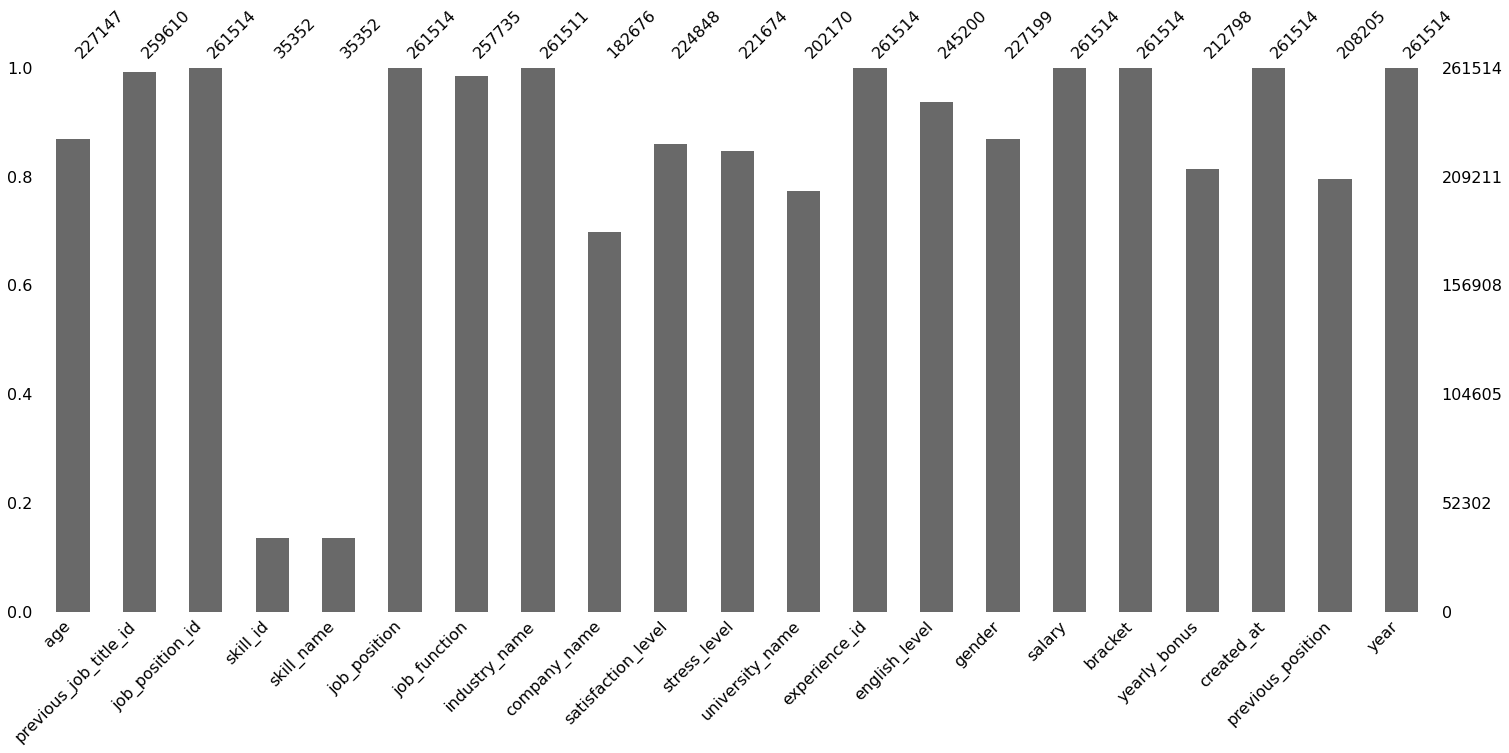

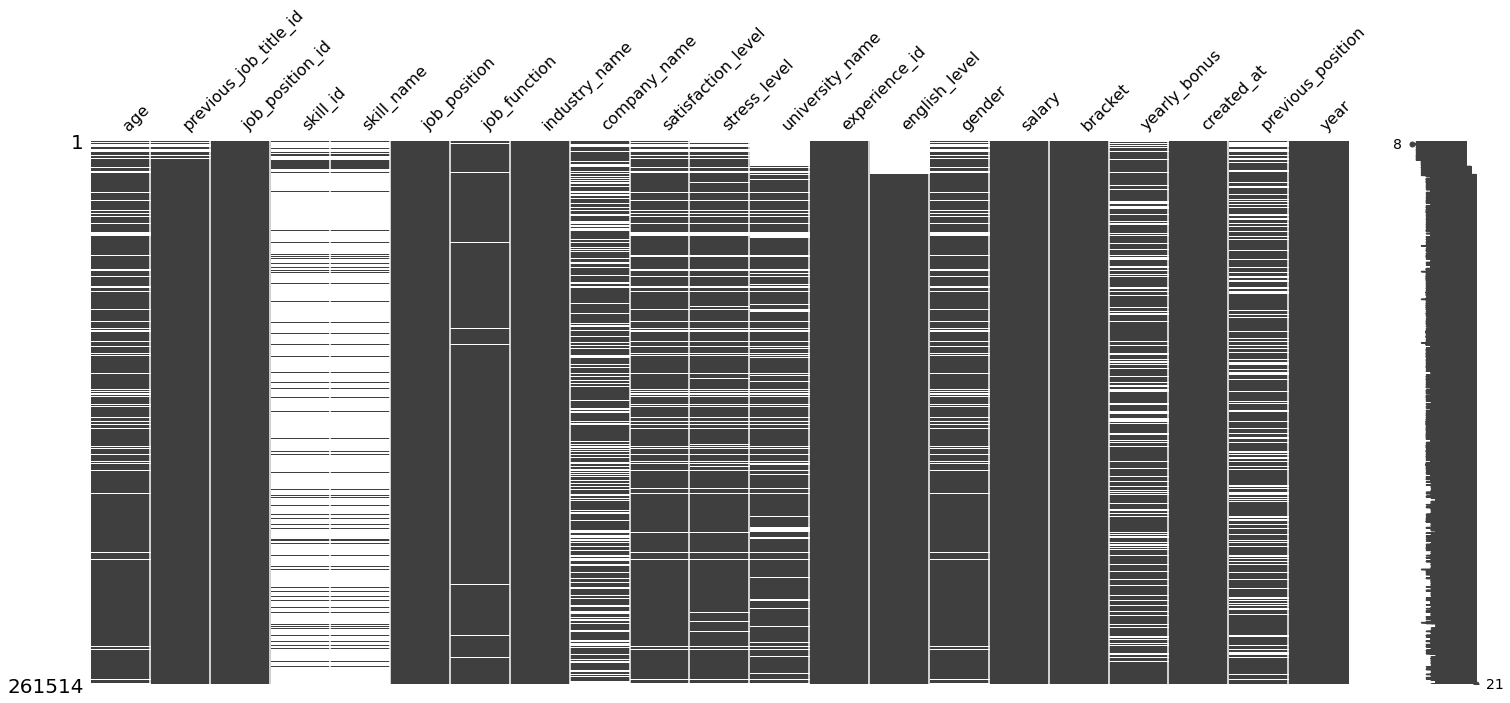

In [12]:
import missingno as msno
msno.bar(df_nonfilt)
msno.matrix(df_nonfilt)

In [22]:
# Columns with missing values
na_cols = df_nonfilt.columns[df_nonfilt.isna().any()].tolist()

# Missing values summary
missing_values = pd.DataFrame(df_nonfilt[na_cols].isna().sum(), columns=['Number_missing'])
missing_values['Percentage_missing']=np.round(100*missing_values['Number_missing']/len(df_nonfilt),2)
missing_values

,Number_missing,Percentage_missing


## Drop Columns

In [14]:
df_nonfilt = df_nonfilt.drop(['skill_id', 'previous_job_title_id'], axis=1)

## Drop NaN

In [15]:
df_nonfilt = df_nonfilt.dropna(subset = ['job_position', 'industry_name', 'english_level', 
                                         'satisfaction_level', 'stress_level', 'gender', 
                                         'yearly_bonus', 'university_name', 'age','job_function',
                                         'previous_position'])

In [16]:
df_nonfilt.shape

(129311, 19)

## Fill NaN

* fill with None

In [17]:
df_nonfilt['company_name'] = df_nonfilt['company_name'].fillna(value='None')
df_nonfilt['skill_name'] = df_nonfilt['skill_name'].fillna(value='None')

### Data Sample (Columns name) ##

In [18]:
catrgorical.columns

Index(['job_position_id', 'skill_id', 'skill_name', 'previous_job_title_id',
       'job_position', 'job_function', 'industry_name', 'company_name',
       'satisfaction_level', 'stress_level', 'university_name',
       'experience_id', 'english_level', 'gender', 'bracket', 'year'],
      dtype='object')

In [19]:
numerical.columns

Index(['salary', 'age', 'yearly_bonus'], dtype='object')

# 🏐 Duplicate

In [20]:
dup = df_nonfilt.duplicated(keep='last')
duplicate_rows = df_nonfilt[dup]
duplicate_count = len(duplicate_rows)
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 67337


In [21]:
duplicate_rows.head()

,age,job_position_id,skill_name,job_position,job_function,industry_name,company_name,satisfaction_level,stress_level,university_name,experience_id,english_level,gender,salary,bracket,yearly_bonus,created_at,previous_position,year
16313,34.0,270,None,Sales Manager,Sales,Engineering - Mechanical / Electrical,Seagull,6.0,7.0,KMUTNB (King Mongkut's University of Technolog...,10,2.0,Male,35000,8-11,480000.0,2018-11-06 16:44:33,Sales,2018
16314,34.0,270,None,Sales Manager,Sales,Engineering - Mechanical / Electrical,Seagull,6.0,7.0,KMUTNB (King Mongkut's University of Technolog...,10,2.0,Male,35000,8-11,480000.0,2018-11-06 16:44:33,Sales,2018
16324,35.0,270,None,Sales Manager,Sales,Advertising / Media,None,5.0,10.0,Chulalongkorn University,10,4.0,Male,55079,8-11,137698.0,2018-11-07 16:35:18,Sales Manager,2018
16325,35.0,270,None,Sales Manager,Sales,Advertising / Media,None,5.0,10.0,Chulalongkorn University,10,4.0,Male,55079,8-11,137698.0,2018-11-07 16:35:18,Sales Manager,2018
16327,21.0,1223,None,Sales Associate,Sales,Automotive / Motor Vehicles,สหกิจมอเตอร์,6.0,6.0,Other University,5,2.0,Female,8500,4-7,8000.0,2018-11-07 16:53:11,Sales IT,2018


## Drop Duplicates

In [23]:
df_cleandup = df_nonfilt.drop_duplicates(keep='last')

In [24]:
df_cleandup.shape

(61974, 19)

# 📈 Outlier 

In [25]:
mu = df_cleandup.groupby(['job_position_id', 'bracket'])['salary'].mean()
sigma = df_cleandup.groupby(['job_position_id', 'bracket'])['salary'].std()

In [26]:
z_scores = df_cleandup.apply(lambda row: (row['salary'] - mu[row['job_position_id'], row['bracket']]) / 
                             sigma[row['job_position_id'], row['bracket']], axis=1)

threshold = 2
outliers_z = df_cleandup[(z_scores > threshold) | (z_scores < -threshold)]

outliers_z.head()

C:\Users\Lenovo\.conda\envs\oc\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,age,job_position_id,skill_name,job_position,job_function,industry_name,company_name,satisfaction_level,stress_level,university_name,experience_id,english_level,gender,salary,bracket,yearly_bonus,created_at,previous_position,year
16740,31.0,403,.NET,Software Developer,IT / Programming,Information Technology,None,3.0,7.0,Mahidol University,6,2.0,Male,80000,4-7,0.0,2018-11-10 18:09:47,Programmer,2018
16741,31.0,403,SQL,Software Developer,IT / Programming,Information Technology,None,3.0,7.0,Mahidol University,6,2.0,Male,80000,4-7,0.0,2018-11-10 18:09:47,Programmer,2018
16742,31.0,403,Javascript,Software Developer,IT / Programming,Information Technology,None,3.0,7.0,Mahidol University,6,2.0,Male,80000,4-7,0.0,2018-11-10 18:09:47,Programmer,2018
16797,38.0,7428,None,Assistant Managing Director,Senior Management,Banking & Finance,None,7.0,8.0,Overseas University,10,3.0,Male,350000,8-11,2000000.0,2018-11-11 16:14:16,Assistant Vice President,2018
16923,25.0,1040,None,Accountant,Accounting,Mixed Industries,Embassy of Argentina,6.0,8.0,Thammasat University,3,4.0,Female,34100,0-3,34100.0,2018-11-12 12:00:05,-,2018


In [27]:
df_clean = df_cleandup.copy()

In [28]:
df_clean = df_clean.drop(outliers_z.index)
df_clean.shape

(59419, 19)

# 🎲 Data Transformation

In [29]:
df_clean.columns

Index(['age', 'job_position_id', 'skill_name', 'job_position', 'job_function',
       'industry_name', 'company_name', 'satisfaction_level', 'stress_level',
       'university_name', 'experience_id', 'english_level', 'gender', 'salary',
       'bracket', 'yearly_bonus', 'created_at', 'previous_position', 'year'],
      dtype='object')

In [30]:
df_clean = df_clean[df_clean['salary'] >= 12000]
df_clean = df_clean[df_clean['salary'] <= 600000]
df_clean = df_clean[df_clean['job_position_id'].map(df_clean['job_position_id'].value_counts()) > 40]

In [31]:
df_clean.shape

(51261, 19)

## Create Age bin

In [32]:
#df_trans = df_clean.copy()

In [33]:
df_clean = df_clean[df_clean['age'].between(18,60)]
#df_trans

In [34]:
# Define bin edges and labels for generations
bin_edges = [0, 21, 38, 54, 60]
generation_labels = ['18-20', '21-37', '38-53', '54-60']

df_clean['age_bin'] = pd.cut(df_clean['age'], bins=bin_edges, labels=generation_labels, include_lowest=True, right=False)
df_clean.head()

,age,job_position_id,skill_name,job_position,job_function,industry_name,company_name,satisfaction_level,stress_level,university_name,experience_id,english_level,gender,salary,bracket,yearly_bonus,created_at,previous_position,year,age_bin
16315,34.0,270,None,Sales Manager,Sales,Engineering - Mechanical / Electrical,Seagull,6.0,7.0,KMUTNB (King Mongkut's University of Technolog...,10,2.0,Male,35000,8-11,480000.0,2018-11-06 16:44:33,Sales,2018,21-37
16326,35.0,270,None,Sales Manager,Sales,Advertising / Media,None,5.0,10.0,Chulalongkorn University,10,4.0,Male,55079,8-11,137698.0,2018-11-07 16:35:18,Sales Manager,2018,21-37
16338,29.0,344,None,Network Engineer,Engineering,Information Technology,None,5.0,7.0,Rajamangala University of Technology Thanyaburi,8,1.0,Male,30000,8-11,30000.0,2018-11-08 07:27:38,System Engineer,2018,21-37
16339,35.0,184,None,Marketing Manager,Marketing / Advertising,Advertising / Media,test dominik,8.0,7.0,Chulalongkorn University,8,3.0,Male,120000,8-11,80000.0,2018-11-08 21:18:25,Marketing Executive,2018,21-37
16340,35.0,184,Digital Marketing,Marketing Manager,Marketing / Advertising,Advertising / Media,test dominik,8.0,7.0,Chulalongkorn University,8,3.0,Male,120000,8-11,80000.0,2018-11-08 21:18:25,Marketing Executive,2018,21-37


In [35]:
for label in generation_labels:
    unique_values_for_label = df_clean.loc[df_clean['age_bin'] == label, 'age'].unique()
    print(f"Unique values for {label}: {unique_values_for_label}")

Unique values for 18-20: [20. 18. 19.]
Unique values for 21-37: [34. 35. 29. 28. 30. 27. 33. 36. 25. 31. 22. 24. 26. 37. 23. 32. 21.]
Unique values for 38-53: [42. 45. 38. 48. 40. 39. 44. 47. 51. 52. 50. 43. 41. 49. 46. 53.]
Unique values for 54-60: [54. 55. 57. 56. 59. 58.]


In [36]:
df_clean.shape

(51220, 20)

In [37]:
df_clean = df_clean.drop(['age'], axis=1)

In [38]:
df_clean.isnull().sum()

job_position_id       0
skill_name            0
job_position          0
job_function          0
industry_name         0
company_name          0
satisfaction_level    0
stress_level          0
university_name       0
experience_id         0
english_level         0
gender                0
salary                0
bracket               0
yearly_bonus          0
created_at            0
previous_position     0
year                  0
age_bin               9
dtype: int64

In [39]:
df_clean = df_clean.dropna(subset = ['age_bin'])

In [40]:
df_clean.head()

,job_position_id,skill_name,job_position,job_function,industry_name,company_name,satisfaction_level,stress_level,university_name,experience_id,english_level,gender,salary,bracket,yearly_bonus,created_at,previous_position,year,age_bin
16315,270,None,Sales Manager,Sales,Engineering - Mechanical / Electrical,Seagull,6.0,7.0,KMUTNB (King Mongkut's University of Technolog...,10,2.0,Male,35000,8-11,480000.0,2018-11-06 16:44:33,Sales,2018,21-37
16326,270,None,Sales Manager,Sales,Advertising / Media,None,5.0,10.0,Chulalongkorn University,10,4.0,Male,55079,8-11,137698.0,2018-11-07 16:35:18,Sales Manager,2018,21-37
16338,344,None,Network Engineer,Engineering,Information Technology,None,5.0,7.0,Rajamangala University of Technology Thanyaburi,8,1.0,Male,30000,8-11,30000.0,2018-11-08 07:27:38,System Engineer,2018,21-37
16339,184,None,Marketing Manager,Marketing / Advertising,Advertising / Media,test dominik,8.0,7.0,Chulalongkorn University,8,3.0,Male,120000,8-11,80000.0,2018-11-08 21:18:25,Marketing Executive,2018,21-37
16340,184,Digital Marketing,Marketing Manager,Marketing / Advertising,Advertising / Media,test dominik,8.0,7.0,Chulalongkorn University,8,3.0,Male,120000,8-11,80000.0,2018-11-08 21:18:25,Marketing Executive,2018,21-37


# 🔎 EDA -- DATA

<AxesSubplot:>

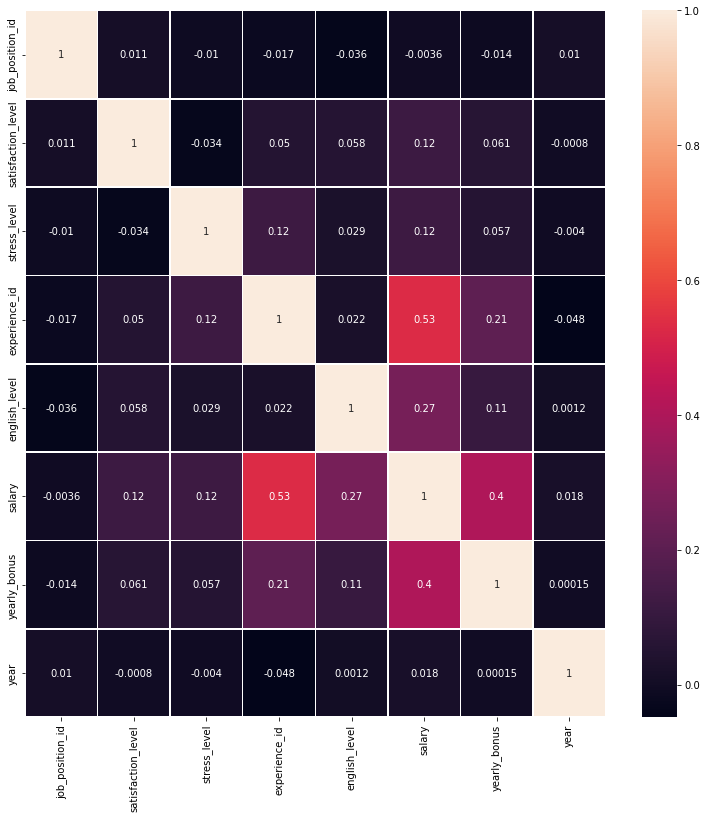

In [41]:
# Correlation Matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(df_clean.corr(), annot=True, linewidths=.5, ax=ax)

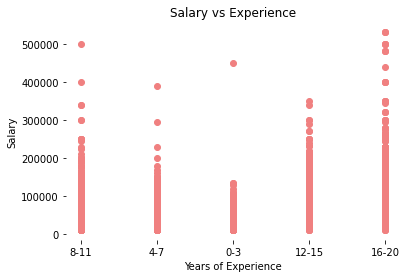

In [42]:
plt.scatter(df_clean['bracket'], df_clean['salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

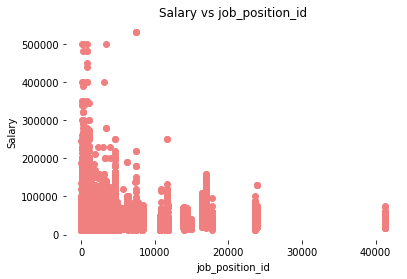

In [43]:
plt.scatter(df_clean['job_position_id'], df_clean['salary'], color = 'lightcoral')
plt.title('Salary vs job_position_id')
plt.xlabel('job_position_id')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [44]:
df_clean.shape

(51211, 19)

In [45]:
df_clean['year'].value_counts()

2022    22054
2023    15040
2024     6998
2019     3137
2021     2333
2020      847
2018      802
Name: year, dtype: int64

# 📊 Save data to visualize

In [46]:
df_clean.to_csv('final_project.csv', index=False)  

In [47]:
df_clean.columns

Index(['job_position_id', 'skill_name', 'job_position', 'job_function',
       'industry_name', 'company_name', 'satisfaction_level', 'stress_level',
       'university_name', 'experience_id', 'english_level', 'gender', 'salary',
       'bracket', 'yearly_bonus', 'created_at', 'previous_position', 'year',
       'age_bin'],
      dtype='object')

# 📅 Encoding

In [48]:
df = df_clean.copy()

In [49]:
# Delete id
df = df.drop(['created_at', 'job_position_id', 'experience_id'], axis=1)

In [52]:
df.dtypes

skill_name              object
job_position            object
job_function            object
industry_name           object
company_name            object
satisfaction_level     float64
stress_level           float64
university_name         object
english_level          float64
gender                  object
salary                   int64
bracket                 object
yearly_bonus           float64
previous_position       object
year                     int64
age_bin               category
dtype: object

In [53]:
#df['age_bin'] = df['age_bin'].astype('object')

## 📚 Label Encoding

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
le = LabelEncoder()
#df.experience_id = le.fit_transform(df.experience_id)
df.company_name = le.fit_transform(df.company_name)
df.skill_name = le.fit_transform(df.skill_name)
df.gender = le.fit_transform(df.gender)
df.bracket = le.fit_transform(df.bracket)

In [55]:
df.satisfaction_level = le.fit_transform(df.satisfaction_level)
df.stress_level = le.fit_transform(df.stress_level)
df.year = le.fit_transform(df.year)
df.age_bin = le.fit_transform(df.age_bin)
df.previous_position = le.fit_transform(df.previous_position)

In [108]:
df.job_function = le.fit_transform(df.job_function)
df.industry_name = le.fit_transform(df.industry_name)
df.job_position = le.fit_transform(df.job_position)
df.university_name = le.fit_transform(df.university_name)
df.english_level = le.fit_transform(df.english_level)

## 🧮 One-hot Encoding

In [56]:
import pickle

def get_encoder_inst(feature_col):
  
    assert isinstance(feature_col, pd.Series)
    feature_vec = feature_col.sort_values().values.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(feature_vec) 
  
    filename = '.pickle'
    pickle.dump(enc, open(filename, 'wb'))
    return enc

def get_one_hot_enc(feature_col, enc,cols):
  
    assert isinstance(feature_col, pd.Series)
    assert isinstance(enc, OneHotEncoder)
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec).toarray()
    column_name = enc.get_feature_names([cols])
    encoded_df = pd.DataFrame(encoded_vec, columns= column_name)
    return encoded_df

In [57]:
df.columns

Index(['skill_name', 'job_position', 'job_function', 'industry_name',
       'company_name', 'satisfaction_level', 'stress_level', 'university_name',
       'english_level', 'gender', 'salary', 'bracket', 'yearly_bonus',
       'previous_position', 'year', 'age_bin'],
      dtype='object')

In [58]:
ohe_cat_list = ['job_function', 'industry_name', 'job_position', 'university_name', 'english_level']
#ohe_cat_list = ['company']
ohe_cat_data = df[ohe_cat_list]
df.drop(ohe_cat_list,axis=1,inplace=True)

In [59]:
data_list = []
for cols in ohe_cat_data.columns:
    encoder = get_encoder_inst(ohe_cat_data[cols])
    one = get_one_hot_enc(ohe_cat_data[cols],encoder,cols)
    data_list.append(one)
    
final_ohe = pd.concat(data_list,axis=1)
df.reset_index(drop=True, inplace=True)
final_ohe.reset_index(drop=True, inplace=True)
for cols in final_ohe.columns: 
    final_ohe[cols] = final_ohe[cols].astype('int')

In [60]:
df = pd.concat([df,final_ohe],axis=1)
df.shape

(51211, 458)

# 📇 Train Test Split 

In [61]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [62]:
#The axis=1 argument drop columns
X = df.drop('salary', axis=1)
y = df['salary']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
print('X_train shape = ',X_train_scaled.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ',X_test_scaled.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (35847, 457)
y_train shape =  (35847,)
X_test shape =  (15364, 457)
y_test shape =  (15364,)


# 🚟 Building Model

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
# Random Forest Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Decision Tree MSE:", lr_mse)
print("Decision Tree R2:", lr_r2)

Decision Tree MSE: 310051781.2954915
Decision Tree R2: 0.5711685041962782


## 🌲 Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Calculate R-squared (R^2) Score
rf_r2 = r2_score(y_test, rf_predictions)

print('Mean Absolute Error (MAE):', rf_mae)
print('Mean Squared Error (MSE):', rf_mse)
print('Root Mean Squared Error (RMSE):', rf_rmse)
print('R-squared (R^2) Score:', rf_r2)

Mean Absolute Error (MAE): 8174.1139769374295
Mean Squared Error (MSE): 237268937.93524134
Root Mean Squared Error (RMSE): 15403.536539874256
R-squared (R^2) Score: 0.6718341912522032


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Calculate R-squared (R^2) Score
rf_r2 = r2_score(y_test, rf_predictions)

print('Mean Absolute Error (MAE):', rf_mae)
print('Mean Squared Error (MSE):', rf_mse)
print('Root Mean Squared Error (RMSE):', rf_rmse)
print('R-squared (R^2) Score:', rf_r2)

Mean Absolute Error (MAE): 7147.962576942388
Mean Squared Error (MSE): 201669792.04928583
Root Mean Squared Error (RMSE): 14201.048977075103
R-squared (R^2) Score: 0.7210712409986134


## 🌿 Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [71]:
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree MSE:", dt_mse)
print("Decision Tree R2:", dt_r2)

Decision Tree MSE: 338797867.6532153
Decision Tree R2: 0.5314098962638267


## ☂️ Gradient Boosting Regressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
reg_model = GradientBoostingRegressor(random_state=0)
reg_model.fit(X_train_scaled, y_train)
reg_predictions = reg_model.predict(X_test_scaled)

In [73]:
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)
print("Decision Tree MSE:", reg_mse)
print("Decision Tree R2:", reg_r2)

Decision Tree MSE: 265528836.98678893
Decision Tree R2: 0.6327480272221128


## 🐱 Cat Boost Regressor

In [54]:
#from catboost import CatBoostRegressor
#cat_model = CatBoostRegressor(learning_rate=0.1, depth=4, cat_features=cat_features)
#cat_model.fit(X_train_scaled, y_train)
#cat_predictions = cat_model.predict(X_test_scaled)

In [ ]:
#cat_mse = mean_squared_error(y_test, cat_predictions)
#cat_r2 = r2_score(y_test, cat_predictions)
#print("Decision Tree MSE:", cat_mse)
#print("Decision Tree R2:", cat_r2)

## 🚀 XGBoost Regressor

In [170]:
#import xgboost as xg
#xgb_model = xg.XGBRegressor(objective ='reg:linear', seed = 42)
#xgb_model.fit(X_train_scaled, y_train)
#xgb_predictions = xgb_model.predict(X_test_scaled)

In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("Decision Tree MSE:", xgb_mse)
print("Decision Tree R2:", xgb_r2)

# 🚞 Feature Important 

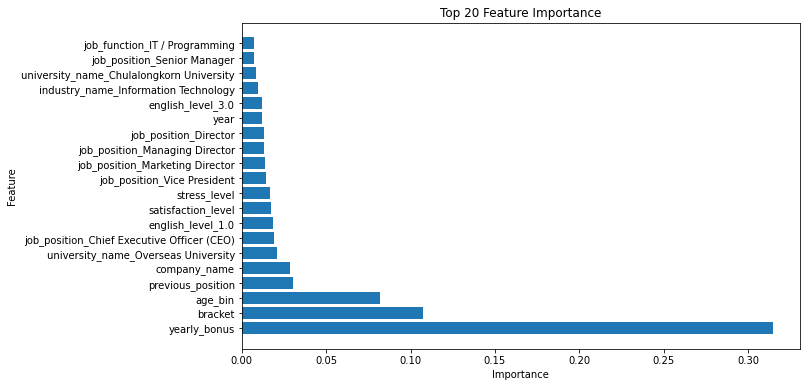

In [101]:
# Assuming X_train_scaled is a DataFrame
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = feature_importance_df.head(20)

# Plot feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.show()

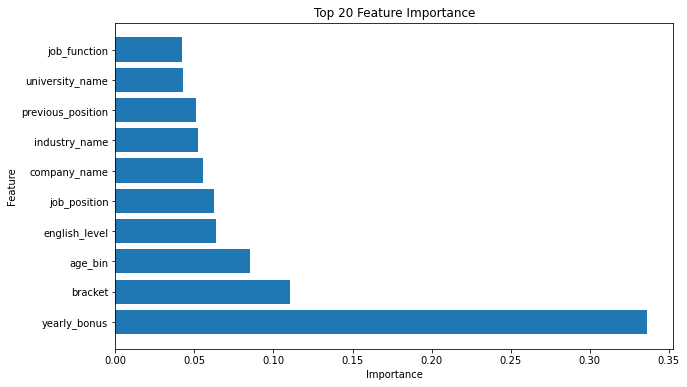

In [123]:
# Assuming X_train_scaled is a DataFrame
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = feature_importance_df.head(10)

# Plot feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.show()

# Feature Selection 

In [160]:
df = df_clean.copy()

In [161]:
df.columns

Index(['job_position_id', 'skill_name', 'job_position', 'job_function',
       'industry_name', 'company_name', 'satisfaction_level', 'stress_level',
       'university_name', 'english_level', 'gender', 'salary', 'bracket',
       'yearly_bonus', 'created_at', 'previous_position', 'year', 'age_bin'],
      dtype='object')

In [162]:
df = df[['yearly_bonus', 'bracket', 'age_bin', 'english_level', 'job_position', 'salary',
           'company_name', 'industry_name', 'previous_position', 'university_name', 'job_function']]

In [163]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
le = LabelEncoder()
#df.experience_id = le.fit_transform(df.experience_id)
df.english_level = le.fit_transform(df.english_level)
df.age_bin = le.fit_transform(df.age_bin)
df.bracket = le.fit_transform(df.bracket)
df.company_name = le.fit_transform(df.company_name)
df.university_name = le.fit_transform(df.university_name)
df.previous_position = le.fit_transform(df.previous_position)

In [164]:
ohe_cat_list = ['job_function', 'industry_name', 'job_position']
#ohe_cat_list = ['company']
ohe_cat_data = df[ohe_cat_list]
df.drop(ohe_cat_list,axis=1,inplace=True)

In [165]:
data_list = []
for cols in ohe_cat_data.columns:
    encoder = get_encoder_inst(ohe_cat_data[cols])
    one = get_one_hot_enc(ohe_cat_data[cols],encoder,cols)
    data_list.append(one)
    
final_ohe = pd.concat(data_list,axis=1)
df.reset_index(drop=True, inplace=True)
final_ohe.reset_index(drop=True, inplace=True)
for cols in final_ohe.columns: 
    final_ohe[cols] = final_ohe[cols].astype('int')

In [166]:
df = pd.concat([df,final_ohe],axis=1)
df.shape

(51211, 399)

In [167]:
#The axis=1 argument drop columns
X = df.drop('salary', axis=1)
y = df['salary']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [169]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
print('X_train shape = ',X_train_scaled.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ',X_test_scaled.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (35847, 398)
y_train shape =  (35847,)
X_test shape =  (15364, 398)
y_test shape =  (15364,)


In [171]:
from sklearn.linear_model import LinearRegression
# Random Forest Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Decision Tree MSE:", lr_mse)
print("Decision Tree R2:", lr_r2)

Decision Tree MSE: 330081977.07035726
Decision Tree R2: 0.5434648129628746


In [179]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

MemoryError: could not allocate 1835008 bytes

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Calculate R-squared (R^2) Score
rf_r2 = r2_score(y_test, rf_predictions)

print('Mean Absolute Error (MAE):', rf_mae)
print('Mean Squared Error (MSE):', rf_mse)
print('Root Mean Squared Error (RMSE):', rf_rmse)
print('R-squared (R^2) Score:', rf_r2)

In [175]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [176]:
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree MSE:", dt_mse)
print("Decision Tree R2:", dt_r2)

Decision Tree MSE: 333613303.68599033
Decision Tree R2: 0.5385806479101017


In [177]:
from sklearn.ensemble import GradientBoostingRegressor
reg_model = GradientBoostingRegressor(random_state=0)
reg_model.fit(X_train_scaled, y_train)
reg_predictions = reg_model.predict(X_test_scaled)

In [178]:
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)
print("Decision Tree MSE:", reg_mse)
print("Decision Tree R2:", reg_r2)

Decision Tree MSE: 274289018.4740744
Decision Tree R2: 0.6206318519335583
